# Indice: 

* Librerías y configuraciones
* Carga de datos
* Funciones auxiliares
* Tablas
    * Tabla df_users
    * Tabla user_items_df
    * Tabla df_items
    * Tabla item_genre
    * Tabla genres
    * Tabla reviews

---

---

# Librerías y configuraciones


In [627]:
import pandas as pd
import ast
import json
from textblob import TextBlob
import matplotlib.pyplot as plt
import warnings


In [628]:
pd.set_option('display.max_colwidth', 100)
warnings.filterwarnings('ignore')


---

---

# Carga de datos

In [629]:
raw_steam_games = pd.read_csv('data/raw_steam_games.csv')
raw_user_items = pd.read_csv('data/raw_user_items.csv')
raw_user_reviews = pd.read_csv('data/raw_user_reviews.csv')

----

----

# Funciones auxiliares

In [630]:
def valores_unicos(df):
    for x in list(df.columns):
        print('cant de valores unicos enla columna', x, ': ', len(df[x].unique()))

In [631]:
def duplicados_de(df):
    df_columns = df.columns.tolist()
    for i in df.columns:
        print( 'Duplicados de ',i,': ', df.duplicated(subset=i,keep=False).sum())

In [632]:
def lista_de_dic_a_df(df,col1,col_list_dic):
    df = df[[col1,col_list_dic]] #filtro el df con las columnas que necesito
    df[col_list_dic] = df[col_list_dic].apply(json.loads) # transformo la lista a str
    df = df.explode(col_list_dic).reset_index(drop=True) #
    llaves = list(df[[col_list_dic]].iloc[0,0].keys())
    for llave in llaves:
        df[llave] = df[col_list_dic].apply(lambda x: x[llave])
    return df

In [633]:
def columna_con_listas_a_df(df,columna):
    data = df[[columna]]
    data.dropna(inplace=True)
    data['name'] = data[columna].apply(ast.literal_eval)
    data = data.explode('name')
    data = data.drop_duplicates(subset='name').reset_index(drop=True)
    data.insert(0,'id_' + columna,range(1,len(data)+1))
    data = data.drop(columns=[columna])
    data.reset_index(drop=True,inplace=True)

    return data

In [634]:
def tabla_intermedia(df,col1_id,col2_lista):
    data = df[[col1_id,col2_lista]]
    # if data[data[['col2_lista']] == '[]'].shape[0] != 0:
    #     data = data.replace('[]', None)
    data = data.dropna()
    data[col2_lista] = data[col2_lista].apply(ast.literal_eval)
    data = data.explode(col2_lista)
    if data.duplicated().sum() != 0:
        data = data.drop_duplicated()
    data.reset_index(drop=True,inplace=True)

    return data

In [635]:
def play_4ever_x_genre(genre):
    id_items_filtrados = df_item_genre[df_item_genre.genres == genre]
    df = pd.merge(
        id_items_filtrados,
        item_id_playtime_forever,
        on = 'item_id',
        how = 'inner'
    )
    # print(genre , df.shape[0])
    cant = df.playtime_forever.sum()

    return cant

In [636]:
def analisis_de_sentimientos(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity < 0:
        return 0  # Negativo
    elif analysis.sentiment.polarity == 0:
        return 1  # Neutral
    else:
        return 2  # Positivo

----

----

# Tablas

---

# Tabla df_users

---

Esta tabla contendrá información sobre los usuarios en las siguientes columnas: user_id, items_count y user_url.

In [637]:
raw_user_items.head(1)

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970982479,"[{""item_id"": ""10"", ""item_name"": ""Counter-Strike"", ""playtime_forever"": 6, ""playtime_2weeks"": 0}, ..."


In [638]:
raw_user_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70939 entries, 0 to 70938
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      70939 non-null  object
 1   items_count  70939 non-null  int64 
 2   steam_id     70939 non-null  int64 
 3   user_url     70939 non-null  object
 4   items        70939 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.7+ MB


In [639]:
valores_unicos(raw_user_items)

cant de valores unicos enla columna user_id :  70912
cant de valores unicos enla columna items_count :  924
cant de valores unicos enla columna steam_id :  70912
cant de valores unicos enla columna user_url :  70912


cant de valores unicos enla columna items :  68901


En un análisis anterior observamos valores de id duplicados. En el caso de la creación de esta tabla seran eliminados ya que no se tomará en cuenta la columna items que es donde difieren las filas.

In [640]:
df_users = raw_user_items.drop_duplicates(subset='user_id')

In [641]:
df_users.head(2)

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970982479,"[{""item_id"": ""10"", ""item_name"": ""Counter-Strike"", ""playtime_forever"": 6, ""playtime_2weeks"": 0}, ..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{""item_id"": ""10"", ""item_name"": ""Counter-Strike"", ""playtime_forever"": 0, ""playtime_2weeks"": 0}, ..."


In [642]:
df_users.shape

(70912, 5)

In [643]:
valores_unicos(df_users)

cant de valores unicos enla columna user_id :  70912
cant de valores unicos enla columna items_count :  924
cant de valores unicos enla columna steam_id :  70912
cant de valores unicos enla columna user_url :  70912


cant de valores unicos enla columna items :  68874


Podemos ver que cada valor de user_id y de user_url son únicos.

In [644]:
df_users = raw_user_items[['user_id','user_url']]

In [645]:
# cargar csv
df_users.to_csv('data/df_users.csv')

-----

# Tabla user_items_df

Esta tabla tendrá como columnas: 
    * user_id(identificación única del usuario),	
    * game_id(identificación única de los juegos) y 
    * playtime_forever( cantidad de horas que el usuario ha jugado a un juego específico).

In [646]:
raw_user_items.head(1)

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970982479,"[{""item_id"": ""10"", ""item_name"": ""Counter-Strike"", ""playtime_forever"": 6, ""playtime_2weeks"": 0}, ..."


In [647]:
#extraemos la info de la columna items
df_users_items = lista_de_dic_a_df(raw_user_items,'user_id','items')
df_users_items = df_users_items[['user_id','item_id','playtime_forever']]
df_users_items

,user_id,item_id,playtime_forever
0,76561197970982479,10,6
1,76561197970982479,20,0
2,76561197970982479,30,7
3,76561197970982479,40,0
4,76561197970982479,50,0
...,...,...,...
5097252,76561198329548331,346330,0
5097253,76561198329548331,373330,0
5097254,76561198329548331,388490,3
5097255,76561198329548331,521570,4


* Análisis de nulos y duplicados

Nulos

In [648]:
print(f'nulos en playtime_forever: ', df_users_items.playtime_forever.isnull().sum())
print(f'nulos en item_id: ', df_users_items.item_id.isnull().sum())

nulos en playtime_forever:  0
nulos en item_id:  0


Duplicados

In [649]:
( 
    df_users_items
    .duplicated()
    .sum()
    )

3165

Elimiaremos las 3165 filas duplicadas

In [650]:
df_users_items = df_users_items.drop_duplicates()

In [651]:
df_users_items.shape

(5094092, 3)

Ahora analizaremos las filas que poseen identicos user_id e item_id pero difieren en playtime_forever.

In [652]:
df_users_items.head(2)

,user_id,item_id,playtime_forever
0,76561197970982479,10,6
1,76561197970982479,20,0


In [653]:
combinaciones_userId_itemId_duplicadas = df_users_items[df_users_items.duplicated(subset=['user_id', 'item_id'], keep=False)].sort_values(by=['user_id', 'item_id'])

In [654]:
combinaciones_userId_itemId_duplicadas

,user_id,item_id,playtime_forever
398432,76561198050680344,377160,1997
1487810,76561198050680344,377160,2058
426051,76561198064956087,40100,2504
1557729,76561198064956087,40100,2543
54357,76561198072861800,433850,5083
2074960,76561198072861800,433850,5084
1535868,76561198079079942,282070,1486
3355746,76561198079079942,282070,1516
355776,76561198081666970,361600,2
3155027,76561198081666970,361600,9


Podemos ver que en lugar de actualizarse los datos de la columna playtime_forever, se ha creado un nuevo registro. Por lo que solo nos quedaremos con las filas que poseen el playtime_forever mayor de cada combinación, user_id-item_id.

In [655]:
combinaciones_userId_itemId_duplicadas_a_eliminar = df_users_items[df_users_items.duplicated(subset=['user_id', 'item_id'], keep='last')].sort_values(by=['user_id', 'item_id'])
combinaciones_userId_itemId_duplicadas_a_eliminar

,user_id,item_id,playtime_forever
398432,76561198050680344,377160,1997
426051,76561198064956087,40100,2504
54357,76561198072861800,433850,5083
1535868,76561198079079942,282070,1486
355776,76561198081666970,361600,2
355743,76561198081666970,730,31410
679943,bwolf7803,221640,1000
680080,bwolf7803,345180,976
680082,bwolf7803,385770,1464
1506379,sergioxks1,291410,1357


In [656]:
filas_a_eliminar = list(combinaciones_userId_itemId_duplicadas_a_eliminar.index)
df_users_items = df_users_items.drop(filas_a_eliminar)

* 'playtime_forever' == 0

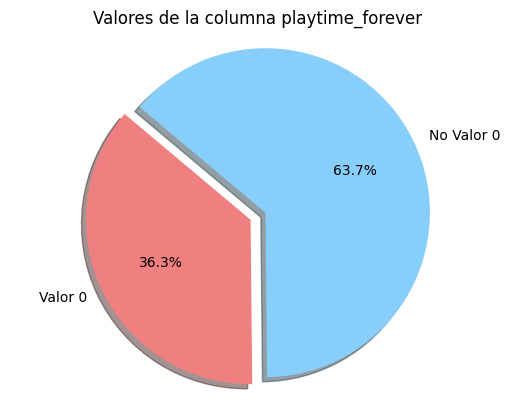

In [657]:
ceros = (df_users_items['playtime_forever'] == 0).sum()
no_ceros = len(df_users_items) - ceros

plt.pie([ceros, no_ceros], 
        explode= (0.1, 0), # separación entre las porciones
        labels= ['Valor 0', 'No Valor 0'], 
        colors= ['lightcoral', 'lightskyblue'], 
        autopct='%1.1f%%', # muestra los porcentajes con un solo dígito antes y después del punto decimal y seguido de un signo de porcentaje.
        shadow=True, # sombra
        startangle=140 # gira el gráfico 140 grados
        )
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Valores de la columna playtime_forever')
plt.show()


Podemos notar que mas de un tercio de los usuarios poseen 0 en playtime_forever. Vamos a eliminar los registros cuyo valor en 'playtime_forever' sean 0 ya que significa que ese usuario ha consumido el item por menos de una hora. Esta columna se utilizará para dos enpoints, ambos requieren sumar las horas de juego, por lo que el eliminar las filas que contienen el valor 0 no afectará a las consultas.

In [658]:
filtro_playtime_forever_not0 = df_users_items.playtime_forever != 0
df_users_items = df_users_items[filtro_playtime_forever_not0].reset_index(drop=True)


In [659]:
df_users_items.shape

(3246352, 3)

In [660]:
df_users_items

,user_id,item_id,playtime_forever
0,76561197970982479,10,6
1,76561197970982479,30,7
2,76561197970982479,300,4733
3,76561197970982479,240,1853
4,76561197970982479,3830,333
...,...,...,...
3246347,76561198329548331,304930,677
3246348,76561198329548331,227940,43
3246349,76561198329548331,388490,3
3246350,76561198329548331,521570,4


In [661]:
# cargar csv
df_users_items.to_csv("data/df_users_items.csv",index=False)

-----


## Tabla items

In [662]:
raw_steam_games.head(1)


,publisher,genres,app_name,title,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,item_id,metascore,developer
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'Strategy']",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_Summoner_Kitty/,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Simulation']",http://steamcommunity.com/app/761140/reviews/?browsefilter=mostrecent&p=1,4.49,['Single-player'],4.99,False,761140,NaN,Kotoshiro


In [663]:
raw_steam_games.shape

(32133, 15)

In [664]:
items = raw_steam_games[['item_id','title','url','release_date','developer','price']] # Debido a que no poseemos información sobre las condiciones en las que se aplicaron los descuentos, solo consideraremos la columna 'price' para las consultas.
items

,item_id,title,url,release_date,developer,price
0,761140,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_Summoner_Kitty/,2018-01-04,Kotoshiro,4.99
1,643980,Ironbound,http://store.steampowered.com/app/643980/Ironbound/,2018-01-04,Secret Level SRL,Free To Play
2,670290,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_Pool_3D__Poolians/,2017-07-24,Poolians.com,Free to Play
3,767400,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,彼岸领域,0.99
4,773570,NaN,http://store.steampowered.com/app/773570/Log_Challenge/,NaN,NaN,2.99
...,...,...,...,...,...,...
32128,773640,Colony On Mars,http://store.steampowered.com/app/773640/Colony_On_Mars/,2018-01-04,"Nikita ""Ghost_RUS""",1.99
32129,733530,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGistICAL_South_Africa/,2018-01-04,Sacada,4.99
32130,610660,Russian Roads,http://store.steampowered.com/app/610660/Russian_Roads/,2018-01-04,Laush Dmitriy Sergeevich,1.99
32131,658870,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_2__Directions/,2017-09-02,"xropi,stev3ns",4.99


Análisis de la tabla items

Nulos

In [665]:
(
    items
    .isna()
    .sum()
)

item_id            0
title           2049
url                0
release_date    2066
developer       3298
price           1377
dtype: int64

Text(0, 0.5, 'Número de fila')

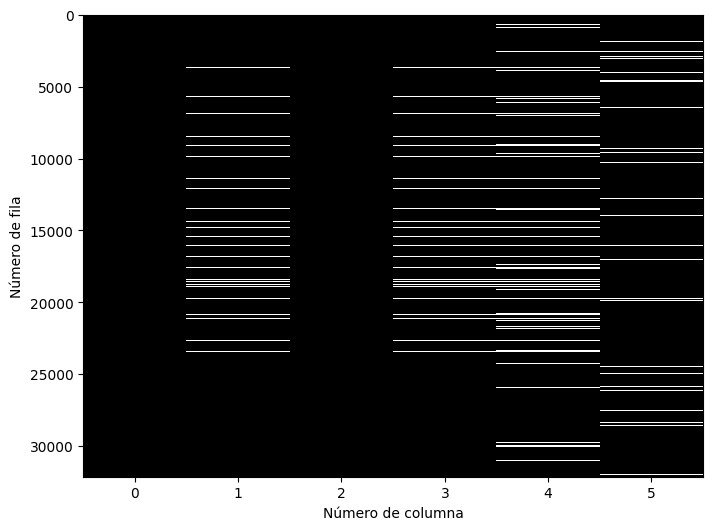

In [666]:
plt.figure(figsize=(8,6))
plt.imshow(items.isna(),
           aspect='auto',
           interpolation='nearest',
           cmap='gray'
           )
plt.xlabel('Número de columna')
plt.ylabel('Número de fila')

Duplicados

In [667]:
(
    items
    .duplicated()
    .sum()
)

0

No tenemos valores nulos en las columnas item_id y url, que es lo que esperamos ya que esos valores deberían ser únicos. 

No tenemos filas duplicadas.

Pudimos notar en una tabla visualizada anteriormente que la columna price posee valores no numéricos.

In [668]:
valores_unicos_de_price = items.price.unique()
print('Cantidad de valores únicos en "precios": ', len(valores_unicos_de_price))
# print('Valores únicos en "precios": ', valores_unicos_de_price)
price_str = [x for x in valores_unicos_de_price if not (str(x).replace('.', '', 1).isdigit() or str(x).isdigit())]
print(f'valores str en price: ', price_str)
print(f'cantidad de valores str en price: ', len(price_str))

Cantidad de valores únicos en "precios":  163
valores str en price:  ['Free To Play', 'Free to Play', nan, 'Free', 'Free Demo', 'Play for Free!', 'Install Now', 'Play WARMACHINE: Tactics Demo', 'Free Mod', 'Install Theme', 'Third-party', 'Play Now', 'Free HITMAN™ Holiday Pack', 'Play the Demo', 'Starting at $499.00', 'Starting at $449.00', 'Free to Try', 'Free Movie', 'Free to Use']
cantidad de valores str en price:  19


Analizaremos la lista lista_sin_numericos


* valores nulos

In [669]:
items[items.price.isna()]

,item_id,title,url,release_date,developer,price
9,768800,Race,http://store.steampowered.com/app/768800/Race/,2018-01-04,RewindApp,NaN
10,768570,Uncanny Islands,http://store.steampowered.com/app/768570/Uncanny_Islands/,Soon..,Qucheza,NaN
31,520680,Lost Cities,http://store.steampowered.com/app/520680/Lost_Cities/,2018-01-01,BlueLine Games,NaN
32,690410,Twisted Enhanced Edition,http://store.steampowered.com/app/690410/Twisted_Enhanced_Edition/,2018-01-01,Games by Brundle,NaN
34,413120,Tactics Forever,http://store.steampowered.com/app/413120/Tactics_Forever/,2018-01-01,ProjectorGames,NaN
...,...,...,...,...,...,...
32097,771070,Infinos Gaiden,http://store.steampowered.com/app/771070/Infinos_Gaiden/,2018-01-19,Picorinne Soft,NaN
32109,90007,International Online Soccer,http://store.steampowered.com/app/90007/International_Online_Soccer/,2002-01-01,I.O.S. Team,NaN
32121,772180,Cricket Club,http://store.steampowered.com/app/772180/Cricket_Club/,January 2018,VersoVR,NaN
32123,771810,The spy who shot me™,http://store.steampowered.com/app/771810/The_spy_who_shot_me/,2018-10-01,Retro Army Limited,NaN


Tenemos 1377 filas con valores nulos en la columna price. Verificaremos si los usuarios han consumido estos items.

In [670]:
# df de juegos sin precio
priceless_items_df = items[items.price.isnull()]
priceless_items_df.to_csv('data/priceless_items_df.csv',index=False)
priceless_items_id_list = list(priceless_items_df.item_id)
df_users_items[df_users_items.item_id.isin(priceless_items_id_list)]


,user_id,item_id,playtime_forever


Podemos verificar que ningun usuario ha consumido los items que carecen de precio.

 * 'Starting at $449.00' y 'Starting at $499.00'


In [671]:
items[items.price ==  'Starting at $449.00']

,item_id,title,url,release_date,developer,price
24999,353390,Alienware Steam Machine,http://store.steampowered.com/app/353390/Alienware_Steam_Machine/,2015-11-10,NaN,Starting at $449.00


In [672]:
items[items.price ==  'Starting at $499.00']

,item_id,title,url,release_date,developer,price
24998,353420,Syber Steam Machine,http://store.steampowered.com/app/353420/Syber_Steam_Machine/,2015-11-10,NaN,Starting at $499.00


In [673]:
items[items.item_id.isin([353390,353420])]

,item_id,title,url,release_date,developer,price
24998,353420,Syber Steam Machine,http://store.steampowered.com/app/353420/Syber_Steam_Machine/,2015-11-10,NaN,Starting at $499.00
24999,353390,Alienware Steam Machine,http://store.steampowered.com/app/353390/Alienware_Steam_Machine/,2015-11-10,NaN,Starting at $449.00


In [674]:
df_users_items[df_users_items.item_id.isin([353390,353420])] # Fueron consumidos por los usuarios?

,user_id,item_id,playtime_forever


Los items 353390 y 353420 serán eliminadas, ya que al ingresar a las urls de estos items hemos sido redirigidos a https://store.steampowered.com/ y al verificar si existen usuarios que hayan consumido estos items nos encontramos con que ningun usuario adquirió estos items. 

In [675]:
items = items[~(items.price.isin(['Starting at $449.00','Starting at $499.00']))]

* Third-party


In [676]:
items[items.price == 'Third-party']

,item_id,title,url,release_date,developer,price
3917,362970,Parcel - Soundtrack,http://store.steampowered.com/app/362970/Parcel__Soundtrack/,2015-07-02,Polar Bunny Ltd,Third-party
31836,3483,Peggle Extreme,http://store.steampowered.com/app/3483/Peggle_Extreme/,2007-09-11,"PopCap Games, Inc.",Third-party


Investigando las urls de los items 362970 y 3483 verificamos que ambos son gratuitos.

* 'install now'

In [677]:
items[items.price == 'Install Now']

,item_id,title,url,release_date,developer,price
2404,268850,EVGA Precision XOC,http://store.steampowered.com/app/268850/EVGA_Precision_XOC/,2014-09-19,EVGA,Install Now


Observando la url del item 268850 verificamos que es gratuito.

* 'Play Now'

In [678]:
items[items.price == 'Play Now']

,item_id,title,url,release_date,developer,price
4025,345040,Oblivious Garden ~White Day,http://store.steampowered.com/app/345040/Oblivious_Garden_White_Day/,2015-07-20,"CorypheeSoft,DigitalEZ",Play Now
26215,383860,Area-X - Extra Gallery,http://store.steampowered.com/app/383860/AreaX__Extra_Gallery/,2015-06-24,Zeiva Inc,Play Now


Observando las urls de los items 345040 y 383860 verificamos que son gratuitos.

* Las descripciones: 'Free', 'Free to Play', 'Free To Play', 'Play WARMACHINE: Tactics Demo', 'Free HITMAN™ Holiday Pack', 'Free Movie', 'Play for Free!', 'Free to Use', 'Free Mod', 'Play the Demo' y 'Free to Try' indican que el item es gratuito. 

* Los items con las descripciones 'Starting at $449.00' y 'Starting at $499.00' fueron eliminadas ya que ningun usuario las consumió, carecen de datos del desarrollador y sus url nos redirigen a la página principal de la tienda.

* Hemos verificado que las descripciones 'Third-party', 'Install Now' y 'Play Now' indican que los items son gratuitos.

* Hemos verificado que los items que poseen valores nulos en precio no han sido consumidos por los usuarios por los que seran eliminados. Sin embargo hemos guardado la información de estos items en el DF priceless_items_df. Todos los demás items de la lista 'lista_sin_numericos' serán reemplazados por 0, ya que no representan un costo para el usuario.

In [679]:
items.dropna(subset='price',inplace=True)


In [680]:
items.price = items.price.replace(price_str, 0)
items.price = items.price.astype("float64")
items.head(2)

,item_id,title,url,release_date,developer,price
0,761140,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_Summoner_Kitty/,2018-01-04,Kotoshiro,4.99
1,643980,Ironbound,http://store.steampowered.com/app/643980/Ironbound/,2018-01-04,Secret Level SRL,0.00


In [681]:
duplicados_de(items)

Duplicados de  item_id :  0
Duplicados de  title :  1983
Duplicados de  url :  0
Duplicados de  release_date :  29447
Duplicados de  developer :  23795
Duplicados de  price :  30682


In [682]:
(
    items
    .isna()
    .sum()
)

item_id            0
title           1932
url                0
release_date    1936
developer       3154
price              0
dtype: int64

Los valores duplicados que podemos notar estan dentro de lo esperado, ya que un desarrollador puede presentar varios items, o items con igual título pueden poseer distintos desarrolladores. Varios items pueden lansarse en una misma fecha o poseer el mismo precio. Podemos notar valores faltantes en las columnas title, release_date y developer. No eliminaremos estas filas ya que poseen valores no nulos en item_id y price. 

In [683]:
items.to_csv("data/df_items.csv",index=False)

----

# Tabla games_genres

In [684]:
df_item_genre = tabla_intermedia(raw_steam_games,'item_id','genres')
df_item_genre.genres = df_item_genre.genres.str.title()

In [685]:
df_item_genre.head(2)

,item_id,genres
0,761140,Action
1,761140,Casual


In [686]:
df_item_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71553 entries, 0 to 71552
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   item_id  71553 non-null  int64 
 1   genres   71553 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [687]:
(
    df_item_genre
    .duplicated()
    .sum()
)

0

Esta tabla no tiene valores nulos ni filas duplicadas

In [688]:
df_item_genre.to_csv("data/df_item_genre.csv",index=False)

----

# Tabla genres

In [689]:
raw_steam_games.head(1)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,item_id,metascore,developer
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'Strategy']",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_Summoner_Kitty/,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Simulation']",http://steamcommunity.com/app/761140/reviews/?browsefilter=mostrecent&p=1,4.49,['Single-player'],4.99,False,761140,NaN,Kotoshiro


In [690]:
genres = columna_con_listas_a_df(raw_steam_games,'genres')
genres.name = genres.name.str.title()

In [691]:
genres

,id_genres,name
0,1,Action
1,2,Casual
2,3,Indie
3,4,Simulation
4,5,Strategy
5,6,Free To Play
6,7,Rpg
7,8,Sports
8,9,Adventure
9,10,Racing


anexo: columna playtime_forever

In [692]:
item_id_playtime_forever = df_users_items[['item_id','playtime_forever']]
item_id_playtime_forever = item_id_playtime_forever.groupby('item_id')['playtime_forever'].sum().reset_index()

In [693]:
item_id_playtime_forever

,item_id,playtime_forever
0,10,17107858
1,100,301732
2,10000,62685
3,1002,894
4,100400,6544
...,...,...
10045,99890,127442
10046,9990,2083
10047,99900,17083206
10048,99910,426210


In [694]:
item_id_playtime_forever.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_id           10050 non-null  object
 1   playtime_forever  10050 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 157.2+ KB


In [695]:
item_id_playtime_forever['item_id'] = item_id_playtime_forever['item_id'].astype('int64')


In [696]:
item_id_playtime_forever.duplicated().sum()

0

No tenemos valores nulos ni duplicados.

In [697]:
play_4ever_x_genre_list = []
for genero in genres.name:
    play_4ever_x_genre_list.append((play_4ever_x_genre(genero)))
genres['playtime_forever'] = play_4ever_x_genre_list

In [698]:
genres = genres.sort_values(by='playtime_forever', ascending=False)
genres['ranking'] = range(1, len(genres) + 1)
genres

,id_genres,name,playtime_forever,ranking
0,1,Action,3074865964,1
2,3,Indie,1475383715,2
6,7,Rpg,1027849083,3
8,9,Adventure,898675144,4
3,4,Simulation,855261582,5
4,5,Strategy,650991704,6
5,6,Free To Play,603563359,7
11,12,Massively Multiplayer,441038278,8
1,2,Casual,249315170,9
10,11,Early Access,156682370,10


In [699]:
genres.to_csv("data/df_genres.csv",index=False)

-----

## Tabla df_reviews 

In [700]:
raw_user_reviews.head(2)

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970982479,"[{""funny"": """", ""posted"": ""Posted November 5, 2011."", ""last_edited"": """", ""item_id"": ""1250"", ""help..."
1,js41637,http://steamcommunity.com/id/js41637,"[{""funny"": """", ""posted"": ""Posted June 24, 2014."", ""last_edited"": """", ""item_id"": ""251610"", ""helpf..."


In [701]:
df_reviews = raw_user_reviews[['user_id','reviews']]
df_reviews.reviews = df_reviews.reviews.apply(json.loads) # transforma el str en lista
df_reviews = df_reviews.explode('reviews').reset_index(drop=True) # analiza lo que  hay dentro de la lista y en este cado lo transforma en un diccionario

In [702]:
llaves = list(df_reviews[['reviews']].iloc[0,0].keys())
llaves

['funny', 'posted', 'last_edited', 'item_id', 'helpful', 'recommend', 'review']

In [703]:
for llave in llaves:
    df_reviews[llave] = df_reviews['reviews'].apply(lambda x: x[llave]) # creamos columnas para el contenido de cada llave

In [704]:
df_reviews = df_reviews.drop(columns=['reviews']) # eliminamos la columna con datos anidados


In [705]:
df_reviews.head(2)

,user_id,funny,posted,last_edited,item_id,helpful,recommend,review
0,76561197970982479,,"Posted November 5, 2011.",,1250,No ratings yet,True,"Simple yet with great replayability. In my opinion does ""zombie"" hordes and team work better tha..."
1,76561197970982479,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.


In [706]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52234 entries, 0 to 52233
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      52234 non-null  object
 1   funny        52234 non-null  object
 2   posted       52234 non-null  object
 3   last_edited  52234 non-null  object
 4   item_id      52234 non-null  object
 5   helpful      52234 non-null  object
 6   recommend    52234 non-null  bool  
 7   review       52234 non-null  object
dtypes: bool(1), object(7)
memory usage: 2.8+ MB


In [707]:
df_reviews.duplicated().sum()

0

No tenemos valores nulos ni filas duplicadas.

Crearemos la columna posted_data con la info de la columna posted. Aquellas que se encuentran incompletas se condideraran como valores nulos.

In [708]:
df_reviews.sort_values('posted').tail(5)

,user_id,funny,posted,last_edited,item_id,helpful,recommend,review
29343,76561198052399653,,Posted September 9.,,452780,1 of 2 people (50%) found this review helpful,True,"This game is really fun to play, you can have it on in the background training, while almost doi..."
16272,whisperrrrrrr,,Posted September 9.,,49520,No ratings yet,True,"This game is so ♥♥♥♥ing fun. You get to run around shooting psychos, the humour is great, and th..."
35855,SpiceyPanda,,Posted September 9.,,268500,1 of 2 people (50%) found this review helpful,True,"Such an amazing TBS, Love it <3"
7773,olivercooli,,Posted September 9.,,294100,1 of 2 people (50%) found this review helpful,True,I have always been a fan of the management game genre but there are few that do it well. And the...
14119,76561198094264350,,Posted September 9.,,304050,No ratings yet,True,It's very good game!!!


In [709]:
formato_de_la_fecha = r'Posted (\w+ \d{1,2}, \d{4})'
df_reviews['posted_date'] = df_reviews['posted'].str.extract(formato_de_la_fecha)
df_reviews['posted_date'] = pd.to_datetime(df_reviews['posted_date'], format='%B %d, %Y')


In [710]:
df_reviews['year'] = df_reviews['posted_date'].dt.year

In [711]:
df_reviews['sentiment_analysis'] = df_reviews['review'].apply(analisis_de_sentimientos)

In [712]:
df_reviews = df_reviews[['user_id', 'item_id','recommend', 'posted_date','year', 'sentiment_analysis']]

In [713]:
df_reviews

,user_id,item_id,recommend,posted_date,year,sentiment_analysis
0,76561197970982479,1250,True,2011-11-05,2011.0,2
1,76561197970982479,22200,True,2011-07-15,2011.0,2
2,76561197970982479,43110,True,2011-04-21,2011.0,2
3,js41637,251610,True,2014-06-24,2014.0,2
4,js41637,227300,True,2013-09-08,2013.0,0
...,...,...,...,...,...,...
52229,76561198310819422,570,True,NaT,NaN,1
52230,76561198312638244,233270,True,NaT,NaN,2
52231,76561198312638244,130,True,NaT,NaN,2
52232,76561198312638244,70,True,NaT,NaN,2


In [714]:
df_reviews.year = df_reviews.year.fillna(0)
df_reviews.year = df_reviews.year.astype(int)

In [715]:
df_reviews

,user_id,item_id,recommend,posted_date,year,sentiment_analysis
0,76561197970982479,1250,True,2011-11-05,2011,2
1,76561197970982479,22200,True,2011-07-15,2011,2
2,76561197970982479,43110,True,2011-04-21,2011,2
3,js41637,251610,True,2014-06-24,2014,2
4,js41637,227300,True,2013-09-08,2013,0
...,...,...,...,...,...,...
52229,76561198310819422,570,True,NaT,0,1
52230,76561198312638244,233270,True,NaT,0,2
52231,76561198312638244,130,True,NaT,0,2
52232,76561198312638244,70,True,NaT,0,2


In [716]:
df_reviews.to_csv('data/df_reviews.csv',index=False)

----